## 공공데이타 포털에서 데이타셋 다운 로드

#### https://www.data.go.kr/ 에서 데이타찾기->데이타 목록->교통사고로 검색->파일데이타->도로교통공단_사망 교통사고 정보 클릭->다운로드

In [1]:
#라이브러리 불러오기
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import seaborn as sns

In [3]:
font= fm.FontProperties(fname=r'C:\Windows\Fonts\gulim.ttc',size=18).get_name()
rc('font',family=font)

In [4]:
#파일 불러오기(다운로드 파일 불러오면 인코딩 에러 발생)
#해결책 1 - encoding='cp949' 추가
#df=pd.read_csv('./data/도로교통공단_사망 교통사고 정보_20201231.csv',encoding='cp949')
#해결책 2 - 파일을 메모장으로 열어서 "다름 이름으로 저장" 인코딩을 utf-8로 선택후 저장
df=pd.read_csv('./data/도로교통공단_사망 교통사고 정보_20201231.csv')

In [5]:
df.shape

(2983, 23)

In [6]:
df.head()

발생년         발생년월일시 주야 요일  사망자수  부상자수  중상자수  경상자수  부상신고자수 발생지시도  ...  \
0  2020  2020-01-01 05  야  수     1     0     0     0       0    서울  ...   
1  2020  2020-01-01 05  야  수     1     0     0     0       0    경기  ...   
2  2020  2020-01-01 07  주  수     1     0     0     0       0    충남  ...   
3  2020  2020-01-01 10  주  수     1     0     0     0       0    경남  ...   
4  2020  2020-01-01 11  주  수     1     0     0     0       0    경기  ...   

      사고유형      가해자법규위반 도로형태_대분류   도로형태 가해자_당사자종별 피해자_당사자종별 발생위치X_UTMK  \
0    차도통행중  안전운전 의무 불이행      단일로  기타단일로       승용차       보행자   959928.0   
1       추돌  안전운전 의무 불이행      단일로  기타단일로       승용차       화물차   951237.0   
2      횡단중  안전운전 의무 불이행      단일로  기타단일로       승용차       보행자   967688.0   
3    공작물충돌  안전운전 의무 불이행      단일로  기타단일로       화물차        없음  1038413.0   
4  도로이탈 추락  안전운전 의무 불이행      단일로  기타단일로       농기계        없음  1011197.0   

  발생위치Y_UTMK          경도         위도  
0  1943154.0  127.046727  37.486761  
1  1916995.0  126.950147  37.250560  
2  1869920.0  127.137666  36.826933  
3  1748968.0  127.924796  35.736290  
4  1900537.0  127.626014  37.103415  

[5 rows x 23 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2983 entries, 0 to 2982
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   발생년         2983 non-null   int64  
 1   발생년월일시      2983 non-null   object 
 2   주야          2983 non-null   object 
 3   요일          2983 non-null   object 
 4   사망자수        2983 non-null   int64  
 5   부상자수        2983 non-null   int64  
 6   중상자수        2983 non-null   int64  
 7   경상자수        2983 non-null   int64  
 8   부상신고자수      2983 non-null   int64  
 9   발생지시도       2983 non-null   object 
 10  발생지시군구      2983 non-null   object 
 11  사고유형_대분류    2983 non-null   object 
 12  사고유형_중분류    2983 non-null   object 
 13  사고유형        2983 non-null   object 
 14  가해자법규위반     2983 non-null   object 
 15  도로형태_대분류    2983 non-null   object 
 16  도로형태        2983 non-null   object 
 17  가해자_당사자종별   2983 non-null   object 
 18  피해자_당사자종별   2983 non-null   object 
 19  발생위치X_UTMK  2983 non-null  

In [8]:
df.columns

Index(['발생년', '발생년월일시', '주야', '요일', '사망자수', '부상자수', '중상자수', '경상자수', '부상신고자수',
       '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '가해자법규위반',
       '도로형태_대분류', '도로형태', '가해자_당사자종별', '피해자_당사자종별', '발생위치X_UTMK',
       '발생위치Y_UTMK', '경도', '위도'],
      dtype='object')

#### 결측치 다루기 

##### 결측치가 1000(임의로 정함)개 이상인 컬럼들은 제거하자

In [9]:
df.isna().sum()#컬럼별 결측치 . 결측치가 없다

발생년           0
발생년월일시        0
주야            0
요일            0
사망자수          0
부상자수          0
중상자수          0
경상자수          0
부상신고자수        0
발생지시도         0
발생지시군구        0
사고유형_대분류      0
사고유형_중분류      0
사고유형          0
가해자법규위반       0
도로형태_대분류      0
도로형태          0
가해자_당사자종별     0
피해자_당사자종별     0
발생위치X_UTMK    0
발생위치Y_UTMK    0
경도            0
위도            0
dtype: int64

In [10]:
#결측치 없어서 일부러 결측치를 가진 컬럼을 추가하자
df['추가컬럼2']=np.nan # 컬럼을 끝에 추가

In [11]:
df.insert(5,'추가컬럼1',np.nan)#인덱스가 5인 열에 컬럼명은 '추가컬럼1' 으로 중간에 삽입

In [12]:
df.columns

Index(['발생년', '발생년월일시', '주야', '요일', '사망자수', '추가컬럼1', '부상자수', '중상자수', '경상자수',
       '부상신고자수', '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '가해자법규위반',
       '도로형태_대분류', '도로형태', '가해자_당사자종별', '피해자_당사자종별', '발생위치X_UTMK',
       '발생위치Y_UTMK', '경도', '위도', '추가컬럼2'],
      dtype='object')

###### 1. 컬럼별 결측치 수 파악

In [13]:
nan = df.isnull().sum()
nan

발생년              0
발생년월일시           0
주야               0
요일               0
사망자수             0
추가컬럼1         2983
부상자수             0
중상자수             0
경상자수             0
부상신고자수           0
발생지시도            0
발생지시군구           0
사고유형_대분류         0
사고유형_중분류         0
사고유형             0
가해자법규위반          0
도로형태_대분류         0
도로형태             0
가해자_당사자종별        0
피해자_당사자종별        0
발생위치X_UTMK       0
발생위치Y_UTMK       0
경도               0
위도               0
추가컬럼2         2983
dtype: int64

##### 2.결측치 시리즈 데이타를 데이타프레임으로 변환

In [14]:
#시리즈의 색인(컬럼명)을 데이타프레임의 컬럼으로 변경하기 위한 작업:reset_index()
df_nan=nan.reset_index()#시리즈를 데이타프레인으로 변경(시리즈의 색인명과 데이타가 데이타프레임의 데이타가 된다)
                        #이때 데이타 프레임의 행 색인은 정수 색인이고 컬럼색인은 index 와  0(색인명이 없을때) 혹은 색인명이 된다
df_nan

index     0
0          발생년     0
1       발생년월일시     0
2           주야     0
3           요일     0
4         사망자수     0
5        추가컬럼1  2983
6         부상자수     0
7         중상자수     0
8         경상자수     0
9       부상신고자수     0
10       발생지시도     0
11      발생지시군구     0
12    사고유형_대분류     0
13    사고유형_중분류     0
14        사고유형     0
15     가해자법규위반     0
16    도로형태_대분류     0
17        도로형태     0
18   가해자_당사자종별     0
19   피해자_당사자종별     0
20  발생위치X_UTMK     0
21  발생위치Y_UTMK     0
22          경도     0
23          위도     0
24       추가컬럼2  2983

##### 3. 컬럼인덱스 변경

In [15]:
#컬럼인덱스 변경하기 :['index', 0] ->['컬럼명','결측치수']
df_nan.columns =['컬럼명','결측치수']
df_nan

컬럼명  결측치수
0          발생년     0
1       발생년월일시     0
2           주야     0
3           요일     0
4         사망자수     0
5        추가컬럼1  2983
6         부상자수     0
7         중상자수     0
8         경상자수     0
9       부상신고자수     0
10       발생지시도     0
11      발생지시군구     0
12    사고유형_대분류     0
13    사고유형_중분류     0
14        사고유형     0
15     가해자법규위반     0
16    도로형태_대분류     0
17        도로형태     0
18   가해자_당사자종별     0
19   피해자_당사자종별     0
20  발생위치X_UTMK     0
21  발생위치Y_UTMK     0
22          경도     0
23          위도     0
24       추가컬럼2  2983

In [16]:
#결측치수를 기준으로 내림차순 정렬
df_nan.sort_values(by='결측치수',ascending=False)

컬럼명  결측치수
24       추가컬럼2  2983
5        추가컬럼1  2983
13    사고유형_중분류     0
23          위도     0
22          경도     0
21  발생위치Y_UTMK     0
20  발생위치X_UTMK     0
19   피해자_당사자종별     0
18   가해자_당사자종별     0
17        도로형태     0
16    도로형태_대분류     0
15     가해자법규위반     0
14        사고유형     0
0          발생년     0
1       발생년월일시     0
11      발생지시군구     0
10       발생지시도     0
9       부상신고자수     0
8         경상자수     0
7         중상자수     0
6         부상자수     0
4         사망자수     0
3           요일     0
2           주야     0
12    사고유형_대분류     0

##### 4.결측치가 1000개 이상  있는 행들의 모든 컬럼들 보기

In [17]:
#결측치가 1000개 이상  있는 행들의 모든 컬럼들 보기
df_nan_columns=df_nan.loc[df_nan['결측치수'] >=1000,:]#df_nan[df_nan['결측치수'] >=1000]와 같다
df_nan_columns

컬럼명  결측치수
5   추가컬럼1  2983
24  추가컬럼2  2983

##### 5. 1000개이상인 컬럼명들을 리스트로 변환

In [18]:
drop_columns=df_nan_columns['컬럼명'].tolist()
drop_columns

['추가컬럼1', '추가컬럼2']

##### 6. 1000개이상인 컬럼명들 제거

In [19]:
#결측치가 1000개 이상인 컬럼들은 제거하자
#열을 기준으로 삭제해야 하기 때문에 axis = 1을 지정. 행을 삭제하려면 0(디폴트)
df.drop(drop_columns,axis=1,inplace=True)

In [20]:
df.columns

Index(['발생년', '발생년월일시', '주야', '요일', '사망자수', '부상자수', '중상자수', '경상자수', '부상신고자수',
       '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '가해자법규위반',
       '도로형태_대분류', '도로형태', '가해자_당사자종별', '피해자_당사자종별', '발생위치X_UTMK',
       '발생위치Y_UTMK', '경도', '위도'],
      dtype='object')

In [21]:
#전체 컬럼에 대한 수치 통계정보 보기(디폴트가 수치형만)
df.describe()#include='number' 디폴트

발생년         사망자수         부상자수         중상자수         경상자수  \
count  2983.0  2983.000000  2983.000000  2983.000000  2983.000000   
mean   2020.0     1.032853     0.523299     0.201475     0.291317   
std       0.0     0.223367     1.666546     0.687610     1.123770   
min    2020.0     1.000000     0.000000     0.000000     0.000000   
25%    2020.0     1.000000     0.000000     0.000000     0.000000   
50%    2020.0     1.000000     0.000000     0.000000     0.000000   
75%    2020.0     1.000000     0.000000     0.000000     0.000000   
max    2020.0     5.000000    34.000000    15.000000    26.000000   

            부상신고자수    발생위치X_UTMK    발생위치Y_UTMK           경도           위도  
count  2983.000000  2.983000e+03  2.983000e+03  2983.000000  2983.000000  
mean      0.030506  1.005322e+06  1.816711e+06   127.556677    36.344690  
std       0.299913  7.656462e+04  1.185022e+05     0.849581     1.069357  
min       0.000000  7.551000e+05  1.472154e+06   124.717593    33.236656  
25%       0.000000  9.457388e+05  1.721949e+06   126.898283    35.491403  
50%       0.000000  9.772488e+05  1.822210e+06   127.243321    36.393870  
75%       0.000000  1.069786e+06  1.928738e+06   128.269203    37.356135  
max      12.000000  1.296158e+06  2.046122e+06   130.848830    38.411686

In [22]:
#특정 컬럼에 대한 수치 통계정보 보기(디폴트가 수치형만)
df[['사망자수','중상자수']].describe()

사망자수         중상자수
count  2983.000000  2983.000000
mean      1.032853     0.201475
std       0.223367     0.687610
min       1.000000     0.000000
25%       1.000000     0.000000
50%       1.000000     0.000000
75%       1.000000     0.000000
max       5.000000    15.000000

In [23]:
#수치 데이타뿐만 아니라 모든 타입의 컬럼들에 대한 통계수치 보기
df.describe(include='all')#unique ,top(가장 높은 빈도로 출현하는 데이터),freq(가장 높은 빈도로 출현한 데이터의 빈도수) 추가됨

발생년         발생년월일시    주야    요일         사망자수         부상자수  \
count   2983.0           2983  2983  2983  2983.000000  2983.000000   
unique     NaN           2457     2     7          NaN          NaN   
top        NaN  2020-08-10 13     주     수          NaN          NaN   
freq       NaN              4  1574   482          NaN          NaN   
mean    2020.0            NaN   NaN   NaN     1.032853     0.523299   
std        0.0            NaN   NaN   NaN     0.223367     1.666546   
min     2020.0            NaN   NaN   NaN     1.000000     0.000000   
25%     2020.0            NaN   NaN   NaN     1.000000     0.000000   
50%     2020.0            NaN   NaN   NaN     1.000000     0.000000   
75%     2020.0            NaN   NaN   NaN     1.000000     0.000000   
max     2020.0            NaN   NaN   NaN     5.000000    34.000000   

               중상자수         경상자수       부상신고자수 발생지시도  ...  사고유형      가해자법규위반  \
count   2983.000000  2983.000000  2983.000000  2983  ...  2983         2983   
unique          NaN          NaN          NaN    17  ...    16            8   
top             NaN          NaN          NaN    경기  ...    기타  안전운전 의무 불이행   
freq            NaN          NaN          NaN   593  ...   705         2000   
mean       0.201475     0.291317     0.030506   NaN  ...   NaN          NaN   
std        0.687610     1.123770     0.299913   NaN  ...   NaN          NaN   
min        0.000000     0.000000     0.000000   NaN  ...   NaN          NaN   
25%        0.000000     0.000000     0.000000   NaN  ...   NaN          NaN   
50%        0.000000     0.000000     0.000000   NaN  ...   NaN          NaN   
75%        0.000000     0.000000     0.000000   NaN  ...   NaN          NaN   
max       15.000000    26.000000    12.000000   NaN  ...   NaN          NaN   

       도로형태_대분류   도로형태 가해자_당사자종별 피해자_당사자종별    발생위치X_UTMK    발생위치Y_UTMK  \
count      2983   2983      2983      2983  2.983000e+03  2.983000e+03   
unique        5     11        12        15           NaN           NaN   
top         단일로  기타단일로       승용차       보행자           NaN           NaN   
freq       1819   1646      1350      1062           NaN           NaN   
mean        NaN    NaN       NaN       NaN  1.005322e+06  1.816711e+06   
std         NaN    NaN       NaN       NaN  7.656462e+04  1.185022e+05   
min         NaN    NaN       NaN       NaN  7.551000e+05  1.472154e+06   
25%         NaN    NaN       NaN       NaN  9.457388e+05  1.721949e+06   
50%         NaN    NaN       NaN       NaN  9.772488e+05  1.822210e+06   
75%         NaN    NaN       NaN       NaN  1.069786e+06  1.928738e+06   
max         NaN    NaN       NaN       NaN  1.296158e+06  2.046122e+06   

                 경도           위도  
count   2983.000000  2983.000000  
unique          NaN          NaN  
top             NaN          NaN  
freq            NaN          NaN  
mean     127.556677    36.344690  
std        0.849581     1.069357  
min      124.717593    33.236656  
25%      126.898283    35.491403  
50%      127.243321    36.393870  
75%      128.269203    37.356135  
max      130.848830    38.411686  

[11 rows x 23 columns]

In [24]:
#요일별 교통사고 발생 건수
df.groupby(by='요일').size().sort_values(ascending=False)#요일별 카운트 수로 freq가 482 확인
df['요일'].value_counts().sort_values(ascending=False)

수    482
금    453
월    440
화    434
목    408
토    395
일    371
Name: 요일, dtype: int64

In [25]:
#발생지시도가 어디인가?
df['발생지시도'].unique()
#df['발생지시도'].nunique()#유니크한 갯수(n는 number)

array(['서울', '경기', '충남', '경남', '경북', '부산', '제주', '충북', '울산', '전남', '강원',
       '광주', '전북', '인천', '대전', '대구', '세종'], dtype=object)

In [26]:
#발생지시도별 교통사고 발생 건수
#df.groupby('발생지시도').size().sort_values() 혹은
sido=df['발생지시도'].value_counts().sort_values(ascending=False)
sido

경기    593
경북    345
경남    273
전남    260
충남    253
서울    218
전북    206
충북    157
강원    132
대구    110
부산    100
인천     88
제주     67
대전     66
광주     58
울산     50
세종      7
Name: 발생지시도, dtype: int64

In [96]:
#발생지시도별 요일별 사망자수
#death_count=df.groupby(['발생지시도','요일'])['사망자수'].agg(['count'])
death_count=df.groupby(['발생지시도','요일'])['사망자수'].count()
death_count.index#MultiIndex
#MultiIndex를 Index로 변환
death_count = death_count.reset_index()
death_count

발생지시도 요일  사망자수
0      강원  금    13
1      강원  목    27
2      강원  수    17
3      강원  월    20
4      강원  일    23
..    ... ..   ...
113    충북  수    25
114    충북  월    24
115    충북  일    22
116    충북  토    27
117    충북  화    20

[118 rows x 3 columns]

<AxesSubplot:xlabel='발생지시도', ylabel='count'>

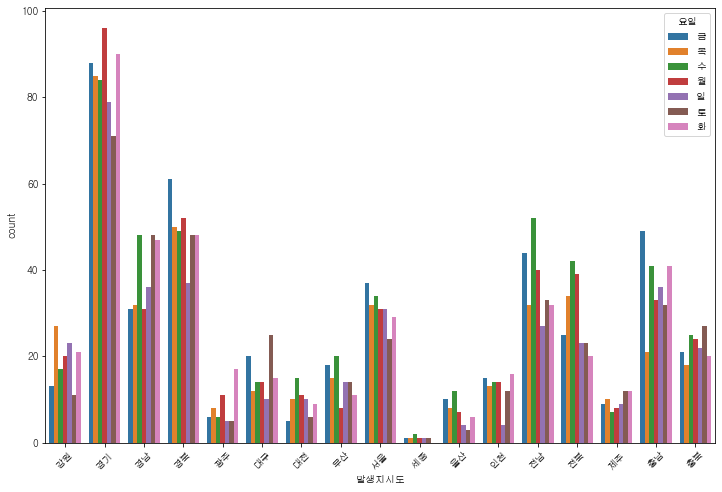

In [86]:
#발생지시도별 요일별 사망자수 시각화
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
sns.barplot(data=death_count,x='발생지시도',y='count',hue='요일')

In [28]:
#사고유형은 어떤거?
df['사고유형'].unique()

array(['차도통행중', '추돌', '횡단중', '공작물충돌', '도로이탈 추락', '도로이탈 기타', '기타', '정면충돌',
       '측면충돌', '길가장자리구역통행중', '전도', '전복', '보도통행중', '주/정차차량 충돌', '후진중충돌',
       '철길건널목'], dtype=object)

In [29]:
#사고유형별 교통사고 건수
df.groupby('사고유형').size().sort_values(ascending=False)
df['사고유형'].value_counts().sort_values(ascending=False)

기타            705
횡단중           518
측면충돌          428
추돌            351
공작물충돌         324
차도통행중         192
정면충돌          165
전도             88
도로이탈 추락        83
길가장자리구역통행중     40
도로이탈 기타        30
보도통행중          26
전복             24
주/정차차량 충돌       4
후진중충돌           4
철길건널목           1
Name: 사고유형, dtype: int64

In [30]:
#발생지시도가 서울인 교통사고 데이타만 추출
seoul=df[df['발생지시도']=='서울']
seoul.head()

발생년         발생년월일시 주야 요일  사망자수  부상자수  중상자수  경상자수  부상신고자수 발생지시도  ...  \
0   2020  2020-01-01 05  야  수     1     0     0     0       0    서울  ...   
32  2020  2020-01-04 06  주  토     1     0     0     0       0    서울  ...   
48  2020  2020-01-06 10  주  월     1     0     0     0       0    서울  ...   
58  2020  2020-01-07 22  야  화     1     0     0     0       0    서울  ...   
68  2020  2020-01-10 04  야  금     1     0     0     0       0    서울  ...   

     사고유형      가해자법규위반 도로형태_대분류      도로형태 가해자_당사자종별 피해자_당사자종별 발생위치X_UTMK  \
0   차도통행중  안전운전 의무 불이행      단일로     기타단일로       승용차       보행자   959928.0   
32    횡단중  안전운전 의무 불이행      단일로     기타단일로       승용차       보행자   961691.8   
48    횡단중  안전운전 의무 불이행      교차로  교차로횡단보도내       화물차       보행자   939680.9   
58  차도통행중  안전운전 의무 불이행      단일로     기타단일로       승용차       보행자   955013.7   
68    횡단중  안전운전 의무 불이행      단일로     기타단일로       화물차       보행자   964666.6   

   발생위치Y_UTMK          경도         위도  
0   1943154.0  127.046727  37.486761  
32  1951718.4  127.066231  37.564030  
48  1952886.5  126.816916  37.573379  
58  1941792.6  126.991224  37.474264  
68  1943323.2  127.100318  37.488479  

[5 rows x 23 columns]

In [31]:
#서울의 요일별 교통사고 발생 빈도수(전국은 수요일,서울은 금요일에 가장 많이 발생)
weekday=seoul['요일'].value_counts()
#weekday.name : 요일
weekday

금    37
수    34
목    32
월    31
일    31
화    29
토    24
Name: 요일, dtype: int64

In [32]:
weekday=weekday.reset_index()#시리즈를 데이타프레임으로 변경
weekday

index  요일
0     금  37
1     수  34
2     목  32
3     월  31
4     일  31
5     화  29
6     토  24

In [33]:
#weekday의 컬럼색인 변경
weekday.columns=['요일','발생건수']
weekday

요일  발생건수
0  금    37
1  수    34
2  목    32
3  월    31
4  일    31
5  화    29
6  토    24

#### 시각화하기

<AxesSubplot:xlabel='요일', ylabel='발생건수'>

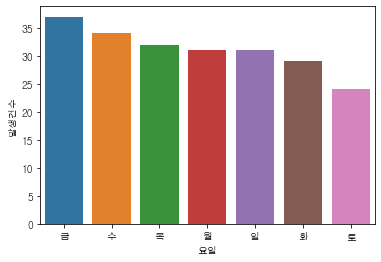

In [34]:
sns.barplot(x='요일',y='발생건수',data=weekday)#서울지역만(weekday 데이타프레임으로)

<AxesSubplot:xlabel='요일', ylabel='count'>

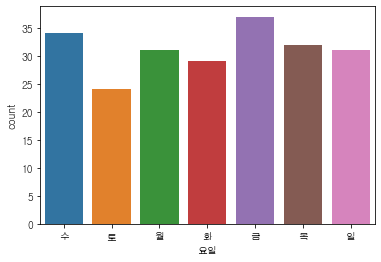

In [35]:
sns.countplot(x='요일',data=df[df['발생지시도']=='서울'])#서울지역만(df 데이타 프레임으로)

In [36]:
#서울에서는 어느 시군구가 교통사고가 많이 발행하는가?
seoul['발생지시군구'].value_counts().sort_values(ascending=False)

강남구     17
강서구     17
은평구     14
관악구     13
마포구     13
용산구     12
송파구     11
동작구     10
구로구     10
동대문구    10
서초구      9
성동구      9
영등포구     7
양천구      7
도봉구      7
성북구      7
강동구      7
서대문구     6
금천구      6
종로구      5
중구       5
노원구      5
중랑구      4
광진구      4
강북구      3
Name: 발생지시군구, dtype: int64

<AxesSubplot:xlabel='발생지시군구', ylabel='count'>

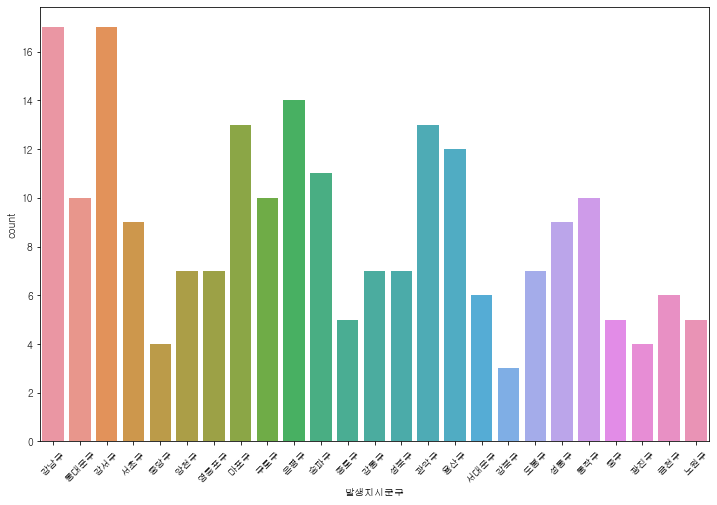

In [37]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
sns.countplot(x='발생지시군구',data=seoul)

In [38]:
#발생지시도가 서울이고 가해자_당사자종별가 승용차인 행만 추출
df_seoul_sedan=seoul[seoul['가해자_당사자종별']=='승용차']
df_seoul_sedan.shape

(86, 23)

In [39]:
seoul_sedan_sigungu=df_seoul_sedan['발생지시군구'].value_counts()
seoul_sedan_sigungu

관악구     8
강남구     6
마포구     6
강서구     6
용산구     5
동대문구    5
서초구     5
노원구     4
성동구     4
동작구     4
금천구     4
도봉구     3
송파구     3
서대문구    3
중구      3
은평구     3
구로구     2
양천구     2
성북구     2
중랑구     2
강북구     2
종로구     2
강동구     1
광진구     1
Name: 발생지시군구, dtype: int64

<AxesSubplot:xlabel='발생지시군구', ylabel='count'>

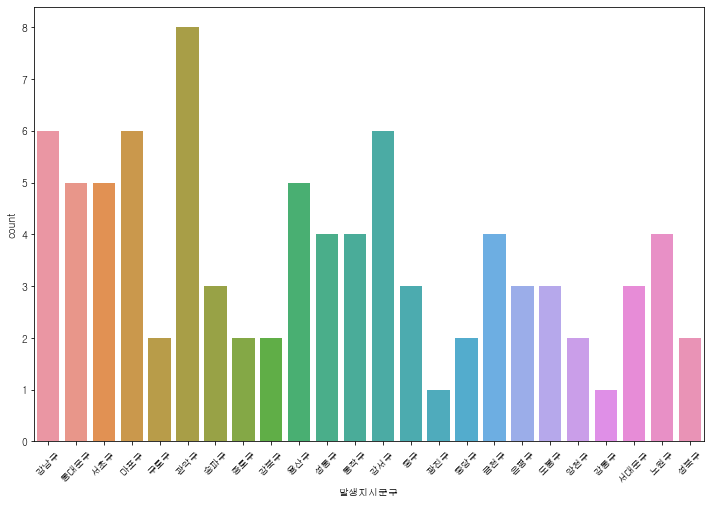

In [40]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
sns.countplot(x='발생지시군구',data=df_seoul_sedan)

In [98]:
#서울의 발생지시군구 요일별 사망자수
#death_count=df.groupby(['발생지시도','요일'])['사망자수'].agg(['count'])
death_count=seoul.groupby(['발생지시군구','요일'])['사망자수'].count()
#MultiIndex를 Index로 변환
death_count = death_count.reset_index()
death_count

발생지시군구 요일  사망자수
0      강남구  금     3
1      강남구  목     1
2      강남구  수     3
3      강남구  월     3
4      강남구  일     2
..     ... ..   ...
120     중구  일     2
121     중구  화     1
122    중랑구  목     1
123    중랑구  월     2
124    중랑구  화     1

[125 rows x 3 columns]

<AxesSubplot:xlabel='발생지시군구', ylabel='사망자수'>

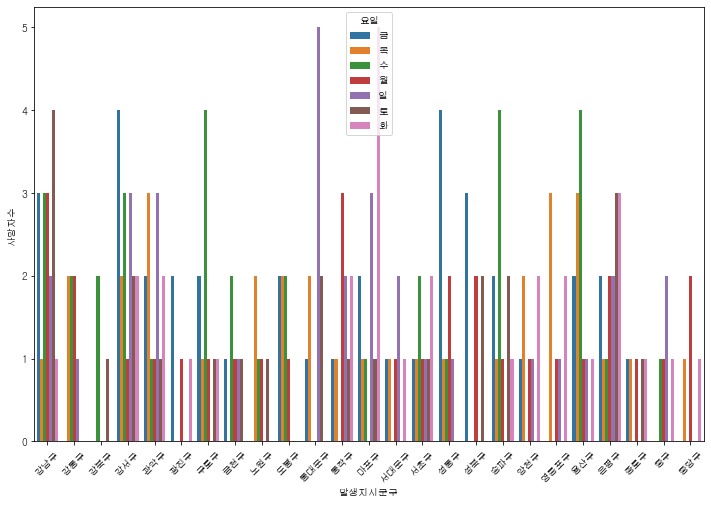

In [92]:
#서울의 발생지시군구별 요일별 사망자수 시각화
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
sns.barplot(data=death_count,x='발생지시군구',y='사망자수',hue='요일')

In [41]:
#가해자_당사자종별이 승용차인  서울의 시군구명만 리스트로 변환
seoul_sedan_sigungu.index.tolist()

['관악구',
 '강남구',
 '마포구',
 '강서구',
 '용산구',
 '동대문구',
 '서초구',
 '노원구',
 '성동구',
 '동작구',
 '금천구',
 '도봉구',
 '송파구',
 '서대문구',
 '중구',
 '은평구',
 '구로구',
 '양천구',
 '성북구',
 '중랑구',
 '강북구',
 '종로구',
 '강동구',
 '광진구']

In [42]:
#위의 시군구명을 넘파이 배열로 변환
#np.array(seoul_sedan_sigungu.index)#dtype=object
np.array(seoul_sedan_sigungu.index.tolist())#dtype='<U4'

array(['관악구', '강남구', '마포구', '강서구', '용산구', '동대문구', '서초구', '노원구', '성동구',
       '동작구', '금천구', '도봉구', '송파구', '서대문구', '중구', '은평구', '구로구', '양천구',
       '성북구', '중랑구', '강북구', '종로구', '강동구', '광진구'], dtype='<U4')

In [43]:
#도로형태에서  '기타'가 포함된 행은 제외
df_seoul_sedan['도로형태'].unique()

array(['기타단일로', '지하차도(도로)내', '교량위', '교차로부근', '교차로내', '터널안', '교차로횡단보도내',
       '기타'], dtype=object)

In [44]:
df_seoul_sedan=df_seoul_sedan[df_seoul_sedan['도로형태'].str.find('기타') == -1]
df_seoul_sedan[df_seoul_sedan['도로형태'].str.find('기타') == -1]['도로형태'].unique() #기타가 포함안된 행들

array(['지하차도(도로)내', '교량위', '교차로부근', '교차로내', '터널안', '교차로횡단보도내'],
      dtype=object)

#### 서울지역에서 발생한 교통사고를 지도로 보기

<AxesSubplot:xlabel='위도', ylabel='경도'>

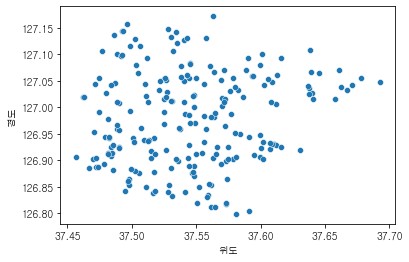

In [45]:
sns.scatterplot(x='위도',y='경도',data=seoul)

## Folium을 사용하기 위해선 직접 Anaconda prompt에 conda install -c conda-forge folium을 입력하여 설치
#### https://python-visualization.github.io/folium/

In [46]:
import folium

In [47]:
#교통사고가 발생한 위치(서울지역)의 위도와 경도  평균
lat = seoul['위도'].mean()
lng = seoul['경도'].mean()
map = folium.Map(location=[lat,lng],zoom_start=12)

In [48]:
map

In [49]:
#서울의 각 지역의 사망자수 와 부상자수(동대문구로 한정)
seoul.query('발생지시군구=="동대문구"').loc[:,['위도','경도','사망자수','부상자수']]#위도아 경도가 반올림된 값임
#37.57986275 ,127.0383918
#seoul.query('위도==37.57986275 & 경도==127.0383918')[['사망자수','부상자수','발생지시군구']]


위도          경도  사망자수  부상자수
32    37.564030  127.066231     1     0
534   37.578357  127.055050     1     0
667   37.576355  127.030541     1     0
1085  37.593550  127.058381     1     0
1394  37.571583  127.071291     1     0
2292  37.568967  127.051668     1     0
2434  37.594226  127.058705     1     0
2690  37.588432  127.070356     1     0
2720  37.582829  127.033428     1     0
2855  37.579863  127.038392     1     2

In [50]:
#위 서울지도에 교통사고가 발생한 위치에 마커 표시
for row_index in seoul.index:
    death_count = seoul.loc[row_index,'사망자수']
    accident_count = seoul.loc[row_index,'부상자수']
    lat = seoul.loc[row_index,'위도']
    lng = seoul.loc[row_index,'경도']
    popuptext = '<h4>사망자수:{}</h4><h5>부상자수:{}</h5><h6>위도:{}</h6><h6>경도:{}</h6>'.format(death_count,accident_count,lat,lng)
    
    location=[lat,lng]
    iframe = folium.IFrame(popuptext,width=150,height=100)
    popup=folium.Popup(iframe)
    folium.Marker(location=location,popup=popup).add_to(map)

In [51]:
map

In [52]:
#위 지도를 HMTL로 저장
map.save('index.html')